In [1]:
from six.moves import cPickle
import os
import matplotlib.pyplot as plt
import numpy as np
import importlib
import utils as ut
from tqdm import tqdm
import mlp as mlp

Using TensorFlow backend.


# Data Preprocessing

In [60]:
importlib.reload(ut)
X_train, y_train, Y_train = ut.loadData('data_batch_1', clipping=True)
X_val, y_val, Y_val = ut.loadData('data_batch_2', clipping=True)
X_test, y_test, Y_test = ut.loadData('test_batch', clipping=True)

data = ut.preprocess_data(X_train, y_train, Y_train, X_val, y_val, Y_val, X_test, y_test, Y_test)
data["X_train"].shape

(3072, 10000)

In [12]:
X_train_whole, y_train_whole, Y_train_whole = ut.loadData('data_batch_1', clipping=True)
X_test, y_test, Y_test = ut.loadData('test_batch', clipping=True)
for i in range(2,6):
    X, y, Y = ut.loadData('data_batch_'+str(i), clipping=True)
    X_train_whole = np.concatenate((X, X_train_whole), axis=1)
    y_train_whole = np.concatenate((y, y_train_whole))
    Y_train_whole = np.concatenate((Y, Y_train_whole), axis=1)
n_val = 5000

X_val, y_val, Y_val = X_train_whole[:,-n_val:], y_train_whole[-n_val:], Y_train_whole[:,-n_val:]
X_train, y_train, Y_train = X_train_whole[:,:-n_val], y_train_whole[:-n_val], Y_train_whole[:,:-n_val]

data_5000 = ut.preprocess_data(X_train, y_train, Y_train, X_val, y_val, Y_val, X_test, y_test, Y_test)
data_5000["X_train"].shape

(3072, 45000)

In [13]:
X_train_whole, y_train_whole, Y_train_whole = ut.loadData('data_batch_1', clipping=True)
X_test, y_test, Y_test = ut.loadData('test_batch', clipping=True)
for i in range(2,6):
    X, y, Y = ut.loadData('data_batch_'+str(i), clipping=True)
    X_train_whole = np.concatenate((X, X_train_whole), axis=1)
    y_train_whole = np.concatenate((y, y_train_whole))
    Y_train_whole = np.concatenate((Y, Y_train_whole), axis=1)
n_val = 1000

X_val, y_val, Y_val = X_train_whole[:,-n_val:], y_train_whole[-n_val:], Y_train_whole[:,-n_val:]
X_train, y_train, Y_train = X_train_whole[:,:-n_val], y_train_whole[:-n_val], Y_train_whole[:,:-n_val]

data_1000 = ut.preprocess_data(X_train, y_train, Y_train, X_val, y_val, Y_val, X_test, y_test, Y_test)
data_1000["X_train"].shape

(3072, 49000)

# Exercise 1: Upgrade Assignment 2 code to train & test k-layer networks
## Check functions step by step

In [15]:
importlib.reload(mlp)
net = mlp.MLP()
bs = 20
X, Y = X_train[:, :bs], Y_train[:, :bs]
P = net.forward_pass(X)
P.shape

(10, 20)

In [16]:
importlib.reload(mlp)
net = mlp.MLP(lamda=0.01)
bs = 20
X, Y = X_train[:, :bs], Y_train[:, :bs]
c = net.compute_cost(X, Y)
c

(2.6225131126746075, 3.2170252533911072)

In [17]:
importlib.reload(mlp)
net = mlp.MLP()
bs = 1
X, Y = X_train[:, :bs], Y_train[:, :bs]
P = net.forward_pass(X)
net.compute_gradients(X, Y, P)
net.update_parameters()

## Check gradients
### 2 Layers network

In [24]:
importlib.reload(mlp)
bs, d = 1, 10
net = mlp.MLP(dims=[d, 50, 10])
X, Y = X_train[:d, :bs], Y_train[:d, :bs]
P = net.forward_pass(X)
net.compute_gradients(X, Y, P)
net.compare_gradients(X, Y, h=1e-5, eps=1e-6)

([2.534100858988858e-10, 1.0982245617702531e-10],
 [6.752789597524107e-11, 3.574998985584907e-11],
 [3.3554197890789567e-12, 3.1799358667095047e-12],
 [3.801446969708966e-12, 7.1245301325184585e-12])

### 3 Layers network

In [30]:
importlib.reload(mlp)
bs, d = 1, 10
net = mlp.MLP(k=3, dims=[d, 50, 50, 10])
X, Y = X_train[:d, :bs], Y_train[:d, :bs]
P = net.forward_pass(X)
net.compute_gradients(X, Y, P)
net.compare_gradients(X, Y, h=1e-5, eps=1e-6)

([8.761912063883459e-10, 2.096097651189875e-10, 7.705520096376509e-10],
 [2.3598750388011644e-10, 7.218053459934161e-11, 7.208806570824076e-11],
 [4.710725172747264e-12, 2.089447104702477e-12, 4.787228970469558e-12],
 [4.156455863085079e-12, 5.7505130171553454e-12, 1.3350229949304903e-11])

### 4 Layers network

In [31]:
importlib.reload(mlp)
bs, d = 1, 10
net = mlp.MLP(k=4, dims=[d, 50, 50, 50, 10])
X, Y = X_train[:d, :bs], Y_train[:d, :bs]
P = net.forward_pass(X)
net.compute_gradients(X, Y, P)
net.compare_gradients(X, Y, h=1e-5, eps=1e-6)

([7.76237820275559e-10,
  1.9764586860288524e-10,
  1.0303015896656487e-09,
  7.936275550986534e-10],
 [1.9001395112660057e-10,
  1.186549868052202e-10,
  6.317410440941135e-11,
  3.676634736684767e-11],
 [4.7577018678641565e-12,
  2.288421423559707e-12,
  2.1303053994231253e-12,
  3.6155236030543587e-12],
 [4.1860561544870835e-12,
  5.478982094409002e-12,
  4.461523199494888e-12,
  8.196275602667669e-12])

### Different batch sizes and lamdas

In [20]:
batch_size = [1, 32, 64, 100]
lambdas = [0, 0.1, 1]

for l in lambdas:
    for bs in batch_size:
        X, Y = X_train[:d, :bs], Y_train[:d, :bs]
        net = mlp.MLP(dims=[d, 50, 10], lamda=l)
        P = net.forward_pass(X)
        net.compute_gradients(X, Y, P)
        rerr_w, rerr_b, aerr_w, aerr_b = net.compare_gradients(X, Y, h=1e-5, eps=1e-6)
        print(f'Batch size: {bs} - Lambda {l}->\n relative_error on gWs {rerr_w} \n relative_error on gbs {rerr_b} \n absolute error on gWs {aerr_w} \n absolute error on gbs {aerr_b}   ')

Batch size: 1 - Lambda 0->
 relative_error on gWs [6.842173318640139e-09, 2.486442854455087e-10] 
 relative_error on gbs [1.6587616452790045e-10, 5.641024873722951e-11] 
 absolute error on gWs [4.899544291336755e-12, 4.539913783449534e-12] 
 absolute error on gbs [5.9559019782023934e-12, 9.097046727024605e-12]   
Batch size: 32 - Lambda 0->
 relative_error on gWs [2.0380855471494506e-09, 1.0605938098343417e-09] 
 relative_error on gbs [1.727229349902716e-09, 1.0047600337423127e-10] 
 absolute error on gWs [1.197043817709317e-11, 1.1487676655470932e-11] 
 absolute error on gbs [1.3269654952218108e-11, 8.14658826508996e-12]   
Batch size: 64 - Lambda 0->
 relative_error on gWs [2.951357358503917e-09, 9.160325403474943e-10] 
 relative_error on gbs [1.9418877923014626e-09, 1.2109216928272436e-09] 
 absolute error on gWs [1.1537261077715457e-11, 1.0964820135997335e-11] 
 absolute error on gbs [1.0975728432669959e-11, 1.0094720567267735e-11]   
Batch size: 100 - Lambda 0->
 relative_error on

## Try to train the network with mini batch gd

In [22]:
importlib.reload(mlp)
net = mlp.MLP(lamda=0)
data_100 = {"X_train": X_train[:,:100], "y_train": y_train[:100], "Y_train": Y_train[:,:100], "X_val":X_val[:,:100], "y_val": y_val[:100], "Y_val": Y_val[:,:100]}
GDparams = {"n_batch":100, "n_epochs":200, "eta":1e-3, "exp":"test_grad"}
net.mini_batch_gd(data_100, GDparams, verbose=True, backup=True)

41424768906559 | train_cost=1.6754708866561137 | val_cost=2.341424768906559
Epoch 84: train_acc=0.56 | val_acc=0.11 | train_loss=1.6695753636044282 | val_loss=2.3410634732754643 | train_cost=1.6695753636044282 | val_cost=2.3410634732754643
Epoch 85: train_acc=0.56 | val_acc=0.11 | train_loss=1.6637405929035536 | val_loss=2.3406739369301808 | train_cost=1.6637405929035536 | val_cost=2.3406739369301808
Epoch 86: train_acc=0.56 | val_acc=0.11 | train_loss=1.6578588482329395 | val_loss=2.3403827798223755 | train_cost=1.6578588482329395 | val_cost=2.3403827798223755
Epoch 87: train_acc=0.58 | val_acc=0.11 | train_loss=1.6520166560966851 | val_loss=2.339872211401996 | train_cost=1.6520166560966851 | val_cost=2.339872211401996
 47%|████▋     | 94/200 [00:03<00:03, 26.73it/s]Epoch 88: train_acc=0.59 | val_acc=0.11 | train_loss=1.6462148155379928 | val_loss=2.3394486291941248 | train_cost=1.6462148155379928 | val_cost=2.3394486291941248
Epoch 89: train_acc=0.61 | val_acc=0.11 | train_loss=1.640

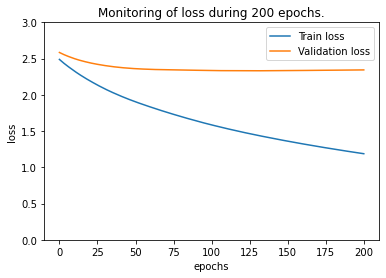

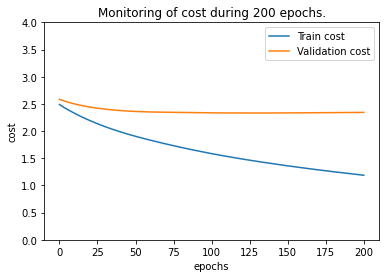

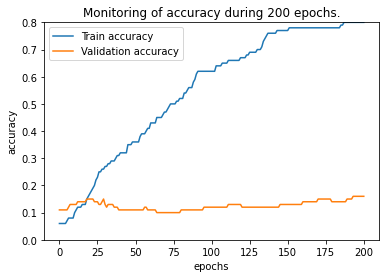

In [23]:
net.plot_metric(GDparams, metric="loss", cyclic=False)
net.plot_metric(GDparams, metric="cost", cyclic=False)
net.plot_metric(GDparams, metric="accuracy", cyclic=False)

# Exercise 2: Can I train multi-layer networks?
## Replicate results of assignement 2

In [153]:
importlib.reload(mlp)
net = mlp.MLP(lamda=.01, batch_norm=False)
GDparams = {"n_cycles":1, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":500, "freq":10, "exp":"rep3"}
net.cyclic_learning(data, GDparams, verbose=True, backup=True)

100%|██████████| 10/10 [00:49<00:00,  4.94s/it]


In [156]:
net.layers

array([<mlp.Layer object at 0x00000197012369E8>,
       <mlp.Layer object at 0x0000019701236E10>], dtype=object)

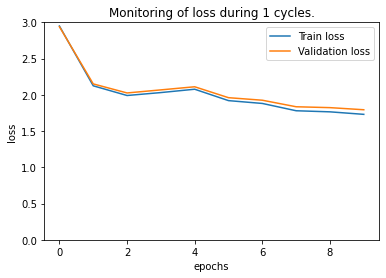

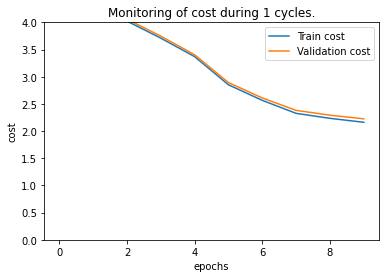

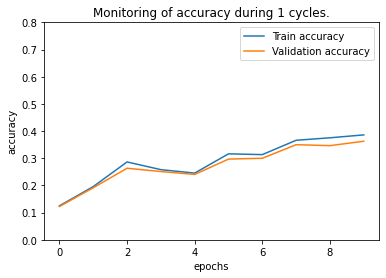

In [154]:
importlib.reload(mlp)
GDparams = {"n_cycles":1, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":500, "freq":10, "exp":"rep3"}
net = mlp.MLP.load_mlp(GDparams, lamda=0.01)
net.plot_metric(GDparams, metric="loss")
net.plot_metric(GDparams, metric="cost")
net.plot_metric(GDparams, metric="accuracy")

In [155]:
net.compute_accuracy(data["X_test"], data["y_test"])

0.3782

## Train a 3-layers network

100%|██████████| 20/20 [05:30<00:00, 16.51s/it]


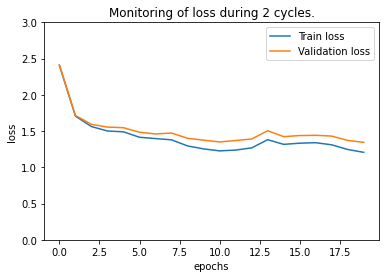

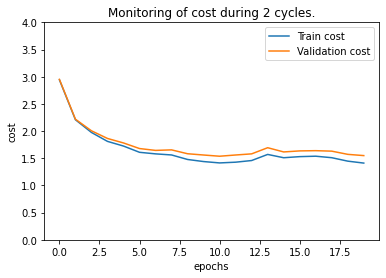

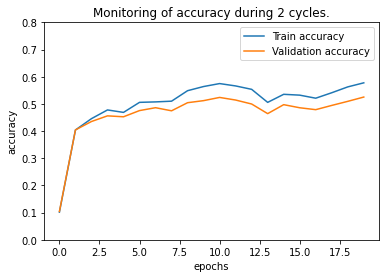

In [41]:
importlib.reload(mlp)
net = mlp.MLP(lamda=.005, k=3, dims=[3072,50,50,10])
GDparams = {"n_cycles":2, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":5*45000//100, "freq":10, "exp":"lay3"}
net.cyclic_learning(data_5000, GDparams, verbose=True, backup=True)
net.plot_metric(GDparams, metric="loss")
net.plot_metric(GDparams, metric="cost")
net.plot_metric(GDparams, metric="accuracy")

In [43]:
net.compute_accuracy(data_5000["X_test"], data_5000["y_test"])

0.5335

## Train a 9-layers network

100%|██████████| 20/20 [05:37<00:00, 16.87s/it]


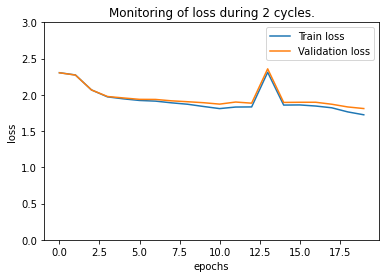

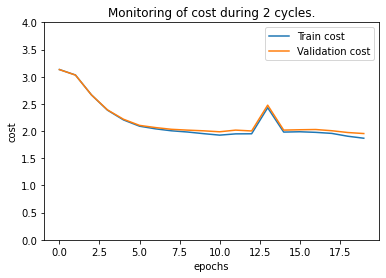

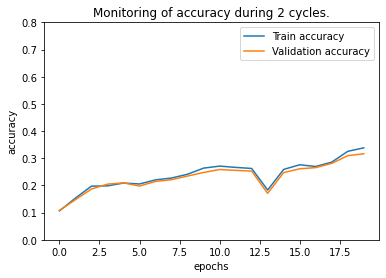

In [47]:
importlib.reload(mlp)
net = mlp.MLP(lamda=.005, k=9, dims=[3072, 50, 30, 20, 20, 10, 10, 10, 10,10])
GDparams = {"n_cycles":2, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":5*45000//100, "freq":10, "exp":"lay9"}
net.cyclic_learning(data_5000, GDparams, verbose=True, backup=True)
net.plot_metric(GDparams, metric="loss")
net.plot_metric(GDparams, metric="cost")
net.plot_metric(GDparams, metric="accuracy")

In [48]:
net.compute_accuracy(data_5000["X_test"], data_5000["y_test"])

0.3289

# Exercise 3: Implement batch normalization
## Check functions step by step

In [140]:
importlib.reload(mlp)
net = mlp.MLP(k=3, dims=[3072, 50, 50, 10], batch_norm=True)
bs = 20
X, Y = X_train[:, :bs], Y_train[:, :bs]
P = net.forward_pass(X, train_mode=True)
P.shape

(10, 20)

In [141]:
net.layers

In [148]:
importlib.reload(mlp)
net = mlp.MLP(k=3, dims=[3072, 50, 50, 10], batch_norm=True)
bs = 20
X, Y = X_train[:, :bs], Y_train[:, :bs]
c = net.compute_cost(X, Y, train_mode=True)
c

(3.1550427717314147, 3.1550427717314147)

In [152]:
importlib.reload(mlp)
net = mlp.MLP(k=3, dims=[3072, 50, 50, 10], batch_norm=True)
bs = 1
X, Y = X_train[:, :bs], Y_train[:, :bs]
P = net.forward_pass(X)
net.compute_gradients_bn(X, Y, P)
net.update_parameters()

## Check the gradients